<a href="https://colab.research.google.com/github/tusharpoddar/e-Science-Research/blob/master/GoogleDrive/Git_vs_Vgg_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The following jupyter notebooks compares the spectrograms that are made using VGGish model and the ones that are made using scipy spectrogram function(named it Git becuause one of our collaborators used it previosuly which is now available on GitHub). 

The notebook does the following things - 
1. It makes two functions to make the spectrograms that were the same as that in the Github repository. The thing uses scipy function to create the data of the spectrogram. 

2. The notebook then loads the vggish spectrogram data. Both the datas represent the same time stamp for the same wav file. 

3. The notebook then compares the spectrograms of both the types in order to see which one of them gives out a clear depiction of the sounds. 

4. After comparing the spectrograms made by the VGG model and that by the scipy function, we found out that the images were much more clear in the latter. In order to get similar spectrograms from the VGG model, I try to then manupulate the data by dividing each row with the max, min and average. 

5. Even after this, values of the scipy spectrogram did not match that of the VGG model.

## Conclusion made - 

With this we came to a conclusion that the spectograms made by the scipy function gave better results. So we decided that we will now be using the spectrograms made using the scipy function for the research. But this had a problem - we had to change the shape of the spectrograms in order for it to be used by the model. 

In [ ]:
# the following code is done in order to compare the spectrograms that we get from the vggish and the ones that we directly get from the function 
# scipy spectrogram. 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive/Shared\ drives/Research

/content/gdrive/Shared drives/Research


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import math
import time
import re
import os

from skimage import util
from scipy.io import wavfile
from scipy import signal
from scipy import stats

import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [ ]:
def create_slice_from_wav(file_path, file_len, slice_len, step_size):
    """Creates small slices from wav file. file_length is desired length of file in minutes.
    slice_len is desired legth of each slice in ms. 
    step_size is how big of step to take between steps (larger size is less overlap)."""
    
    #read in wav file
    samp_freq, sig_data = wavfile.read(file_path)
    print('Sampling frequency: ' + str(samp_freq))
    
    #convert file_length from min to sample numbers
    file_length_num = 5*samp_freq*60
    
    #convert slice_len from ms to sample numbers
    slice_sample_num = slice_len*samp_freq/1000
    print(slice_sample_num)
    
    #use only slices within file_length
    sig_data = sig_data[0:int(file_length_num)]
    
    #determine number of samples and length
    n_samples = sig_data.shape[0]
    print('Number of samples: ' + str(n_samples))
    sig_len = n_samples/samp_freq
    print('Length: ' + str(sig_len) + ' sec')
    
    #create slices 
    steps = int(slice_sample_num*step_size)
    slices = util.view_as_windows(sig_data, window_shape=(slice_sample_num,), step=steps)
    print(f'Audio shape: {sig_data.shape}, Sliced audio shape: {slices.shape}')
    
    return samp_freq, sig_data, slices, steps, sig_len

In [ ]:
def create_spec_from_slice_array(slices, steps, spec_window, NFFT, samp_freq):
    """Creates fft spectrogram from slice. spec_window is length of each segment (nperseg).
    NFFT is length of the FFT used (nfft). samp_freq is sampling frequency (in Hz) of slice (fs).
    steps is step size between slices"""
    
    spec_slices = {}
    samp_freq_kHz = samp_freq/1000

    for i in range(slices.shape[0]): 
        if i % 5000 == 0:
            print(i)
            
        #spectrogram
        freqs_spec, times, Sx = signal.spectrogram(slices[i,:], fs=samp_freq, nperseg = spec_window, nfft = NFFT, mode =  'magnitude')
    
        time_stamp = ((i*steps) / samp_freq_kHz)
    
        #store as dic
        spec_slices[time_stamp] = Sx

    return spec_slices, freqs_spec, times

In [ ]:
file_len=5
slice_len=25
step_size=0.9

spec_window=128
NFFT=512

path = '/content/gdrive/Shared drives/Research/Data/Wav Files/input5mins.wav'

#create slices

samp_freq, sig_data, slices, steps, sig_len = create_slice_from_wav(path, file_len, slice_len, step_size)
#print(str('Slices created in ' + str(end - start) + '  seconds'))

#create spectrograms
spec_slices, freqs_spec, times = create_spec_from_slice_array(slices, steps, spec_window, NFFT, samp_freq)
#print(str('Spectrograms created in ' + str(end - start) + '  seconds'))


Sampling frequency: 250000
6250.0
Number of samples: 75000000
Length: 300.0 sec
Audio shape: (75000000,), Sliced audio shape: (13333, 6250)
0
5000
10000


In [ ]:
print(len(spec_slices))
print(len(spec_slices[0]))
print(len(spec_slices[0][0]))

13333
257
55


In [ ]:
plotting_data = []

In [ ]:
# right now we have a dictionary that is 
x = 0
for i in spec_slices:
  if x < 10:
    print(i, spec_slices[i])
  x = x+1

0.0 [[0.00012895 0.00002994 0.00010945 ... 0.00002565 0.00021882 0.00002983]
 [0.00013014 0.00003601 0.0000948  ... 0.00006226 0.00020541 0.00001401]
 [0.00013214 0.00005922 0.00005762 ... 0.00009498 0.00016949 0.00002742]
 ...
 [0.00391234 0.00932372 0.01009705 ... 0.01320725 0.00297974 0.00232382]
 [0.00509959 0.00587333 0.01348898 ... 0.00798336 0.00581651 0.00259719]
 [0.00560201 0.00448702 0.01486935 ... 0.00382543 0.00686154 0.00272838]]
22.5 [[0.0000294  0.00000664 0.00018466 ... 0.00038078 0.00011692 0.00029686]
 [0.00003205 0.00002173 0.00018718 ... 0.00036533 0.00014704 0.0002858 ]
 [0.00003414 0.00005578 0.0001905  ... 0.00032144 0.00019985 0.0002529 ]
 ...
 [0.00558626 0.0080452  0.01487475 ... 0.00771904 0.00700137 0.0045298 ]
 [0.00381092 0.00521787 0.01327019 ... 0.00803414 0.00768509 0.00446534]
 [0.00241434 0.00331055 0.01226146 ... 0.00810658 0.00792943 0.00417143]]
45.0 [[0.00025873 0.00027387 0.00021782 ... 0.12705284 0.7960951  0.3131941 ]
 [0.0002586  0.00025885 0

In [ ]:
# right now we have a dictionary that is 
for temp in spec_slices:
  plotting_data.append(spec_slices[temp].T)

In [ ]:
arr = np.array(plotting_data) 

In [ ]:
print(arr.shape)

(13333, 55, 257)


In [ ]:
# this represents the array that we get from the scipy spectrogram function
arrShape = arr.shape

In [ ]:
print(arrShape)

(13333, 55, 257)


In [ ]:
# now we get the numpy array that is generated from the vggish model 
vgg_path = '/content/gdrive/Shared drives/Research/Data/Numpy files/5min-Spectrogram.npy'

In [ ]:
vgg_spectrogram = np.load(vgg_path)

In [ ]:
vggShape = vgg_spectrogram.shape

In [ ]:
print(vgg_spectrogram.shape)

(11962, 56, 257)


#### Earlier the notebook was using data of wav files of length 4 mins and 20 seconds and 4 mins(ie different timing for different types). Due to this both had some problem associated with them. So now the notebook uses files of uniform length of 5 mins where in each vggish-spectrogram the length of the window is 25 milliseconds. Whereas in case of scipy-spectrogram the each window is of length 0.0225 seconds. 

The following code is used to compare how the spectrograms of these two numpy files. 

In [ ]:
# converting both the files into 2 dimentions
git_Spectrogram = np.reshape(arr, (arrShape[0]*arrShape[1], arrShape[2]))

In [ ]:
git_Spectrogram.shape

(733315, 257)

In [ ]:
copy1 = git_Spectrogram

In [ ]:
i = 0
for temp in git_Spectrogram:
  i = i + 1
  if i > 4500 and i < 4550:
    # print(np.amin(temp))
    # print(np.amax(temp))
    print(np.average(temp))

1.3135426
1.3745681
1.292528
1.4148797
1.1935068
1.2294607
1.278647
1.1520442
1.3847681
1.2805915
1.2643126
1.2156678
1.2482165
1.3164337
1.2696675
1.3332822
1.2982012
1.1522402
1.0963696
1.2880163
1.233047
1.3859414
1.3231714
1.4281455
1.1876966
1.1899203
1.3283553
1.4328188
1.1767355
1.1540834
1.1655207
1.1170022
1.1291679
1.0745287
1.1011549
1.199029
1.3117971
1.3624111
1.1964523
1.0831736
1.0847636
1.1659805
1.1583948
1.1668773
1.1103553
1.1207321
1.1240094
1.0576227
1.1910872


In [ ]:
git_Spectrogram = git_Spectrogram.T

In [ ]:
git_Spectrogram.shape

(257, 733315)

In [ ]:
vgg_spectrogram = np.reshape(vgg_spectrogram, (vggShape[0]*vggShape[1], vggShape[2]))

In [ ]:
copy2 = vgg_spectrogram

In [ ]:
i = 0
for temp in vgg_spectrogram:
  i = i + 1
  if i > 4500 and i < 4510:
    print(np.amax(temp))
    print(np.average(temp))

From this we get that the values in the vgg spectrogram are more negative. So towards the end I try to 

In [ ]:
vgg_spectrogram = vgg_spectrogram.T

In [ ]:
vgg_spectrogram.shape

(257, 669872)

In [ ]:
time = 121.1951882

In [ ]:
windowTimeGit = int(arrShape[0]*arrShape[1]*time / 300)

In [ ]:
windowTimeVgg = int(vggShape[0]*vggShape[1]*time / 300)

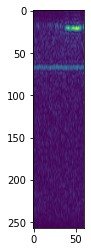

In [ ]:
plt.imshow(git_Spectrogram[:, windowTimeGit - 30:windowTimeGit + 30])

In [ ]:
git_Spectrogram[:, windowTimeGit].shape

(257,)

In [ ]:
minVal = np.amin(np.log(git_Spectrogram[:, windowTimeGit]))
maxVal = np.amax(np.log(git_Spectrogram[:, windowTimeGit]))*1.1
print(minVal)
print(maxVal)

-3.5644531
1.9466488122940064


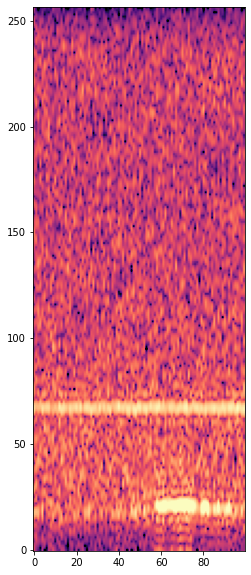

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(np.log(git_Spectrogram[:, windowTimeGit - 50:windowTimeGit + 50]), vmin = minVal, vmax = maxVal, origin='lower', cmap='magma')

-4.474239562916468
-0.6042425607215013


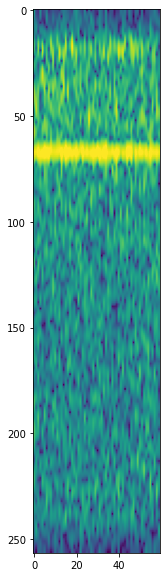

In [ ]:
minVal = np.amin(vgg_spectrogram[:, windowTimeVgg])
maxVal = np.amax(vgg_spectrogram[:, windowTimeVgg])*1.5
print(minVal)
print(maxVal)
plt.figure(figsize=(20,10))
plt.imshow(vgg_spectrogram[:, windowTimeVgg - 30:windowTimeVgg + 30], vmin = minVal, vmax = maxVal)

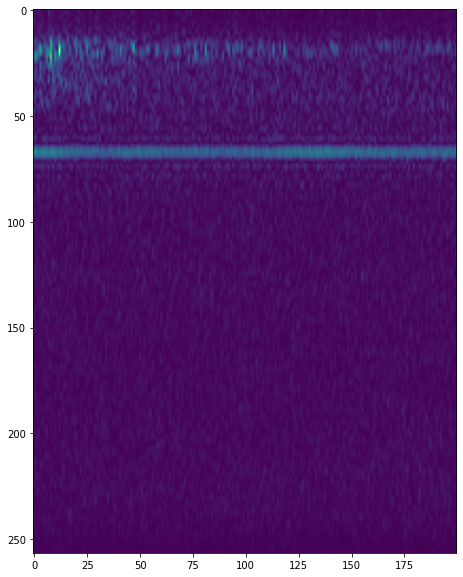

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(git_Spectrogram[:, 4100:4300])

In [ ]:
# in order to get the same i changed the values by dividing each value with the average in that particular cell
# copy1 represents the array of github and copy2 repreesents the array of vggish
# in this i am trying to givide each row with the average of that row
index = 0
for i in copy1:
  temp = np.average(i)
  copy1[index] = copy1[index]/temp
  index = index+1

In [ ]:
i = 0
for temp in copy1:
  i = i + 1
  if i > 4500 and i < 4550:
    print(np.amin(temp))
    print(np.amax(temp))
    print(np.average(temp))

0.019290013
3.3647037
1.0
0.03314012
2.4792078
1.0
0.03816961
2.311048
1.0
0.0223456
2.686925
1.0
0.030913549
2.8612752
1.0
0.084109835
3.3829465
1.0
0.048387516
2.5898519
1.0
0.03926625
2.4770565
1.0
0.022915473
3.7693594
1.0
0.0031110477
2.8531666
1.0
0.0019659055
3.0715013
1.0
0.041708622
3.443633
1.0
0.027469002
3.1982975
1.0
0.07324365
3.1002922
1.0
0.028970873
3.0388813
1.0
0.07316901
3.5575452
1.0000001
0.07966941
3.8759847
1.0
0.030473422
2.623515
1.0
0.051097494
2.6502557
1.0
0.070168234
2.3325596
1.0
0.08932418
2.38851
1.0
0.059862327
2.9292724
1.0
0.09147247
2.8185709
1.0
0.024408922
3.2283921
1.0
0.49186742
1.4583982
1.0
0.040878955
2.7885773
1.0
0.09009946
2.9885092
1.0000001
0.021192353
2.6729848
1.0
0.07385077
3.0762963
1.0
0.009294519
2.7793577
1.0
0.12265003
2.2183132
1.0
0.032627366
2.543018
1.0
0.013994113
2.9061322
1.0
0.10524985
2.7584188
1.0
0.037581217
2.4870858
1.0
0.052578866
2.6642594
1.0
0.07874898
2.6375694
1.0
0.056162123
2.4083676
1.0
0.0895714
2.1186357
1

In [ ]:
index = 0
for i in copy2:
  temp = np.average(i)
  copy2[index] = copy2[index]/temp
  index = index+1

In [ ]:
i = 0
for temp in copy2:
  i = i + 1
  if i > 4500 and i < 4550:
    print(np.amin(temp))
    print(np.amax(temp))
    print(np.average(temp))

0.14229500911651002
1.557855743416122
1.0
0.14456497328401605
1.79246217310862
1.0
0.19895841558781194
1.7200631937436033
1.0
0.11841475858114156
1.877016298793204
1.0000000000000002
0.13308091886378556
1.8363315720227507
1.0000000000000002
0.11539926553494548
1.7025615924116435
1.0
0.13479477895843722
1.5905874493252452
1.0
0.19751569469460423
1.8184461445739715
1.0000000000000002
0.29601820460501044
1.7264076469847585
1.0
0.238010630578002
1.7867290790000434
0.9999999999999998
0.0713654567482251
1.7889100600599679
1.0
0.2646594257464648
1.6593517777944906
1.0
0.14109274499790472
1.8627449823879463
1.0000000000000002
0.18890214602628727
1.6683915544124863
1.0
0.16225384013532554
1.7067471830898446
1.0
0.20431176591222686
1.6517766251468646
0.9999999999999998
0.19991408975681796
1.850029565512899
1.0000000000000002
0.1712978965119918
1.828600235458903
1.0
0.29743967031899954
1.7098503566617258
1.0
0.2278860308226073
1.8557202849287733
1.0000000000000002
0.20029687115921774
1.6696208475

In [ ]:
copy1 = copy1.T
copy2 = copy2.T

In [ ]:
# Scipy
copy1.shape

(257, 733315)

In [ ]:
# VGG
copy2.shape

(257, 669872)

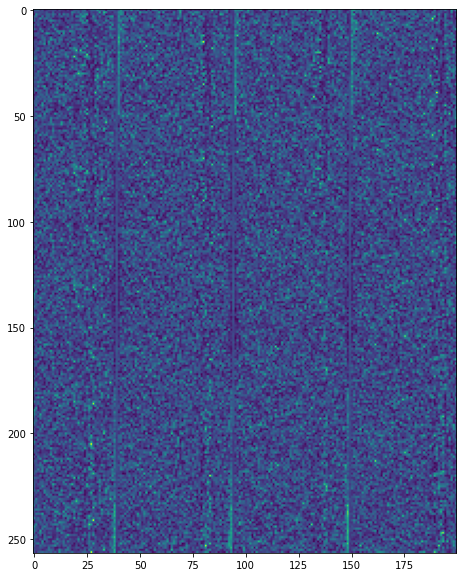

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(copy1[:, 4100:4300])

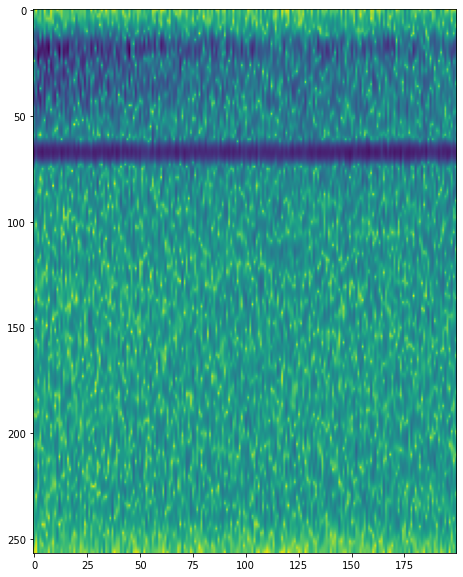

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(copy2[:, 4100:4300])

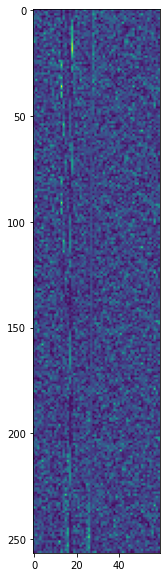

In [ ]:
# plotting a time on the seellection table
plt.figure(figsize=(20,10))
plt.imshow(copy1[:, windowTimeGit - 30:windowTimeGit + 30])

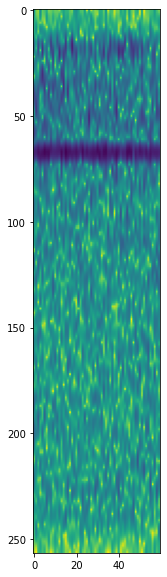

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(copy2[:, windowTimeVgg - 30:windowTimeVgg + 30])